# EcoFAB Phenomics Data Notebook: Image Analysis and Object Detection








### Goal For This Notebook:

1 - Read and visualize an image<br>

2 - Understand image transformations<br>

3 - Detect the leaf from a plant image<br>

---

### Table of Contents

1 - [Read and see content of image (matrix)](#section1)<br>

2 - [Understand image transformations](#section2)<br>

3 - [Detect the leaf from a plant image](#section3)<br>

4 - [Conclusions](#section4)<br>

---

Slides: https://docs.google.com/presentation/d/1BXy7K1L3zOsIuFm1Atg8FWfizw1uG1NvK7Qo-U8aVJ8/edit#slide=id.g12e76f30d4f_0_24

## 1.Read and see an image <a id ='section1'>

In [ ]:
%matplotlib inline

In [ ]:
from skimage import io
import matplotlib.pyplot as plt

Downloads image file from url using commands that people use at command line, think Windows MS DOS or Mac Terminal
**Note**: Any command prepended by exclamation point is run by your operating system shell instead of python


In [ ]:
!wget 'https://www.northenlab.org/wp-content/uploads/sites/9/2022/05/EcoFAB-with-plants-3-768x857.jpg' --no-check-certificate

--2024-07-13 17:04:39--  https://www.northenlab.org/wp-content/uploads/sites/9/2022/05/EcoFAB-with-plants-3-768x857.jpg
Resolving www.northenlab.org (www.northenlab.org)... 172.64.153.44, 104.18.34.212, 2606:4700:4400::6812:22d4, ...
Connecting to www.northenlab.org (www.northenlab.org)|172.64.153.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115618 (113K) [image/jpeg]
Saving to: ‘EcoFAB-with-plants-3-768x857.jpg’

EcoFAB-with-plants- 100%[===================>] 112.91K  --.-KB/s    in 0.09s   

2024-07-13 17:04:40 (1.28 MB/s) - ‘EcoFAB-with-plants-3-768x857.jpg’ saved [115618/115618]



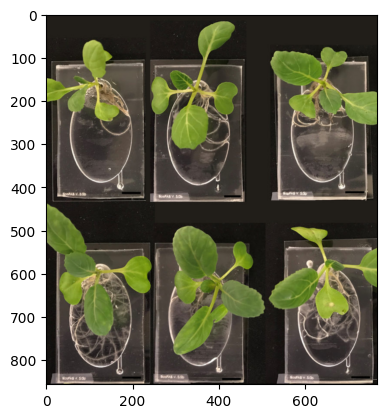

In [ ]:
#downloads image file using io module from skimage library
img_file = 'EcoFAB-with-plants-3-768x857.jpg'
img = io.imread(img_file)
plt.imshow(img)

It is good practice to know the size of your image so that you set your expectations about how long it will take and if you have the computational resources to handle it

In [ ]:
from sys import getsizeof
print("* Image size in mem: {}MB".format(round(getsizeof(img) / 1024 / 1024,2)))

* Image size in mem: 1.88MB


### What is an image? Welcome to the Matrix!
- A color image as a matrix entity is like a party where each pixel is a guest wearing a RGB (Red, Green, Blue) outfit. The matrix is the guest list, where each row and column tells you where the guests stand, and the RGB values are their flashy costumes, detailing just how red, green, or blue each one decided to be. When they all get together, they form a vibrant, visual bash that we call a color image!

In [ ]:
print('* Shape: {}'.format(img.shape))
print('* Type: {}'.format(img.dtype))
print('* Range: {}, {}'.format(img.min(), img.max()))

* Shape: (857, 768, 3)
* Type: uint8
* Range: 0, 255


**What does shape mean?** Your matrix is tridimensional, and it looks like a box for paintings as its height is 857, its width is 768 but the depth is only 3. This means that your color picture has 3 bidimensional matrices to represent color.

So what happens when we take just one color component at a time? Each one is just a "grayscale" image despite the fact that matplotlib uses different 'shades of gray' or palette.

(-0.5, 767.5, 856.5, -0.5)

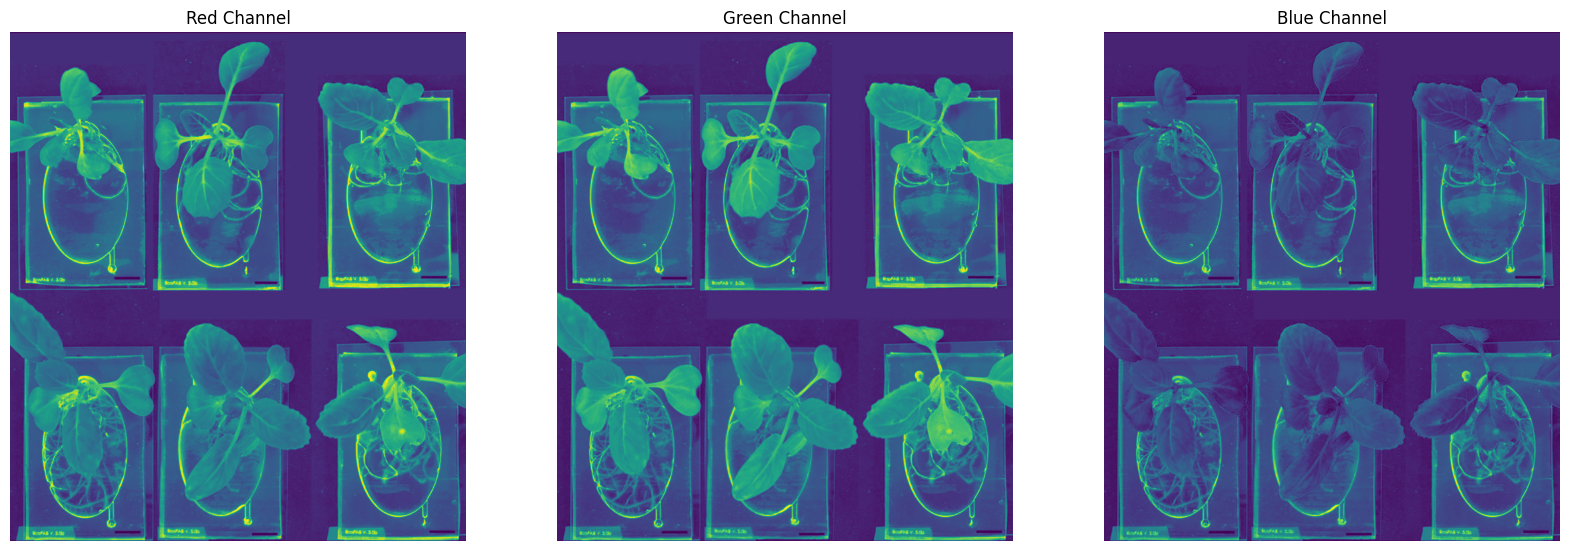

In [ ]:
# Plot each channel
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

axes[0].imshow(img[:,:,0])
axes[0].set_title('Red Channel')
axes[0].axis('off')  # Hide the axis

axes[1].imshow(img[:,:,1])
axes[1].set_title('Green Channel')
axes[1].axis('off')  # Hide the axis

axes[2].imshow(img[:,:,2])
axes[2].set_title('Blue Channel')
axes[2].axis('off')  # Hide the axis


The previous 'intensity palette' or 'colormap' is called viridis, and it was designed to improve graph readability for readers with common forms of color blindness and/or color vision deficiency. Now let's change the colormap aka cmap in matplotlib language

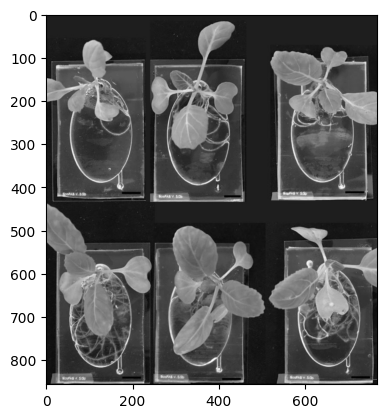

In [ ]:
import numpy as np
green = img[:,:,1] #grabs only the green channel
plt.imshow(green,cmap='gray')

Slicing is a way to subset your matrix and select just one plant, for example, to quickly test a few transformations before you apply them to the whole image

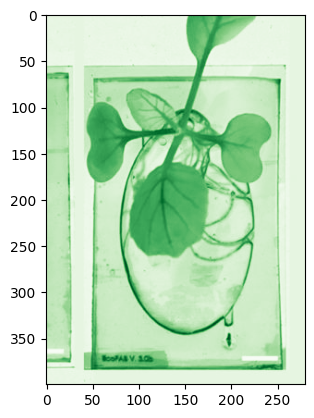

In [ ]:
import numpy as np
tinygreen = img[50:450,200:480,1] # this is slicing
plt.imshow(tinygreen,cmap='Greens')

### Exercise: try using boolean operators in one of the channel, for example, green > 10

In [ ]:
#your code here

### Beyond matplotlib: visualization with plotly
- Plotly is yet another way to visualize your graphs and images, but it offers additional tools for zooming, pamming and inspecting individual pixels. Hover over the image with your mouse and look at the top right of the notebook cell to see additional options

In [ ]:
import plotly.express as px
downsample = 2
fig = px.imshow( green[::downsample,::downsample] )
fig.show()


## 2.Understand image transformations <a id ='section2'>
There are several types of image transformations, some will turn:
- an image into another image, such as in the examples we just saw,
- an image into a vector, such as by checking the frequency of each shade of gray,
- an image into a number, such as finding out the number of plants in the image. Let's continue with more image transformations until we discover ways to count the plants.

### Thresholding
Thresholding, in the world of global evaluation of pixel values using histograms, is like the bouncer at the club of binary images. Imagine each pixel lining up at the door, flashing its value like an ID. The threshold is the bouncer's strict policy: "You're either in or out, buddy." If a pixel's value is high enough (above the threshold), it gets to join the cool, bright side of the image. If not, it's sent to the dark side, no exceptions. This way, thresholding turns a colorful or gray-scale party into a black-and-white affair, where each pixel knows exactly where it stands—no grayscale ambiguity allowed!

Text(0.5, 0, 'intensity')

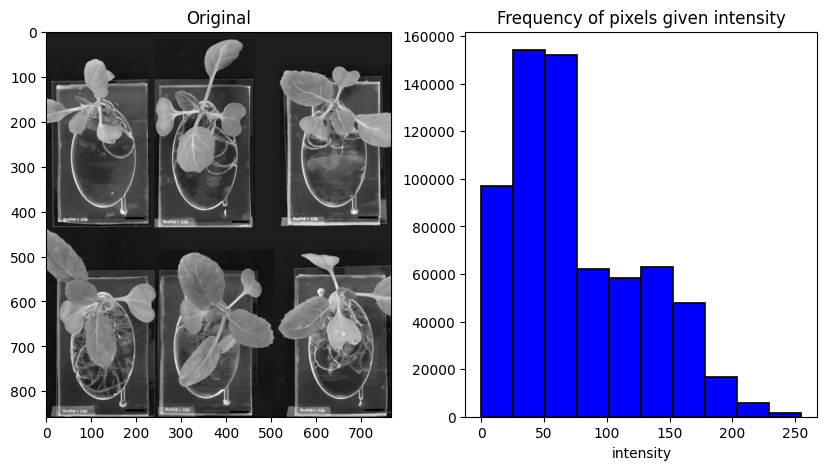

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(green,cmap='gray')
ax[0].set_title('Original')

ax[1].hist(green.flatten(),color='blue',label='gray levels',edgecolor='black', linewidth=1.2) #util.img_as_uint8 img_as_ubyte
ax[1].set_title('Frequency of pixels given intensity')
ax[1].set_xlabel('intensity')


What is the best threshold value? Use the interface below to optimize the threshold.

In [ ]:
!pip install ipywidgets --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.9 MB/s eta 0:00:00


In [ ]:
from ipywidgets import interactive, fixed

def interactive_threshold(image, threshold=128):
    # Apply threshold
    _, ax = plt.subplots()
    ax.imshow(image > threshold, cmap='gray')
    ax.set_title(f'Threshold: {threshold}')
    plt.axis('off')
    plt.show()

widget = interactive(interactive_threshold, image=fixed(green), threshold=(0, 255, 1))

# Display the widget
display(widget)


interactive(children=(IntSlider(value=128, description='threshold', max=255), Output()), _dom_classes=('widget…

**Recap** thresholding: uses global representation of an image, i.e., the histogram of intensity values to determine foreground and background.

### Automating threshold hunt
Zoom and similar video conferencing software use a form of thresholding, among other techniques, to separate you from your background during video calls. This process, often referred to as background segmentation or virtual background technology, involves complex algorithms that go beyond simple thresholding.

Firstly, the software identifies the human figure in the frame, often using machine learning models trained to recognize human shapes and postures. It then applies a form of thresholding to differentiate between the foreground (you) and the background based on color, depth, and sometimes even motion, allowing the software to isolate your figure from the surrounding environment.


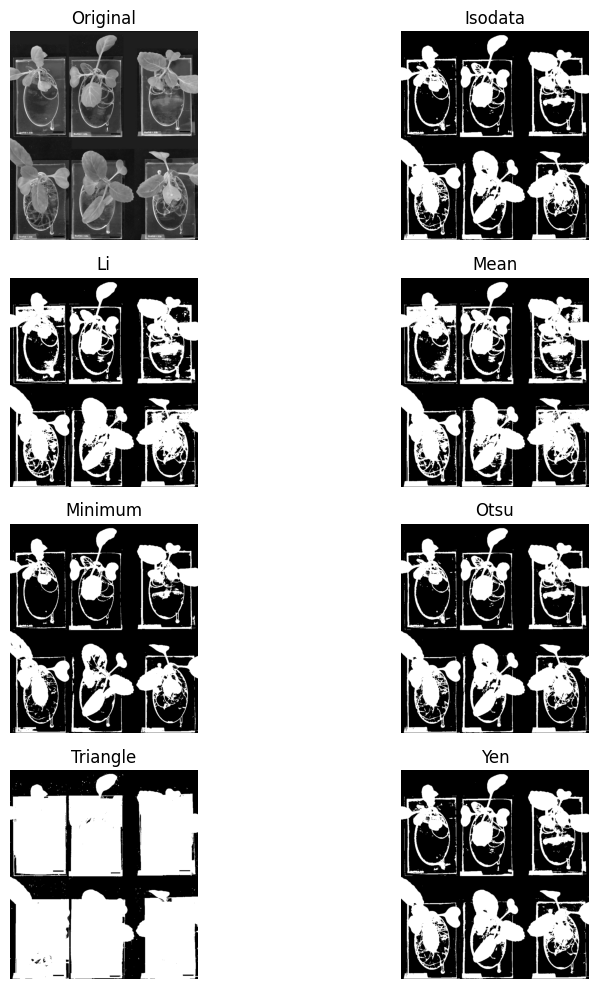

In [ ]:
from skimage.filters import threshold_otsu, threshold_isodata, try_all_threshold

fig, ax = try_all_threshold(green, figsize=(10, 10), verbose=False)

### Exercise: select one thresholding method and apply to an image
- skimage.filters contains several methods to automate the selection of threshold

In [ ]:
#your answer here

### Filters
- rgb to gray: it is different from getting just one channel; instead it is a linear combination of the R,G,B channels


0.9994345098039217
255


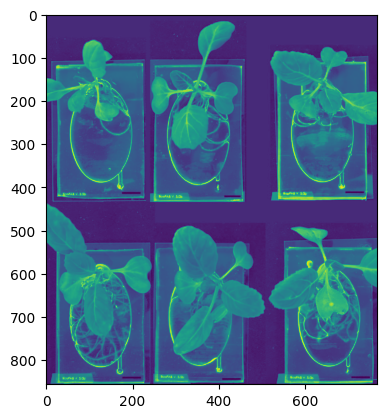

In [ ]:
from skimage import util
from skimage.color import rgb2gray

img2gray = rgb2gray(img)
plt.imshow(img2gray)
print(np.max(img2gray))
img2gray = util.img_as_ubyte(img2gray)
print(np.max(img2gray))

- smoothing: Gaussian and median use convolution operations to smooth a pixel based on neighborhood information (aka window). *Think your job is to smudge licenses plates.*

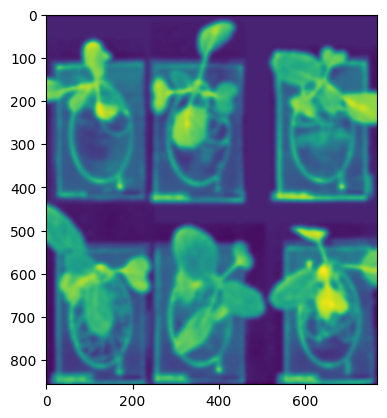

In [ ]:
from skimage import filters
green2Gaussian = filters.gaussian(green,sigma=5)
plt.imshow(green2Gaussian)
green2Gaussian = util.img_as_ubyte(green2Gaussian)

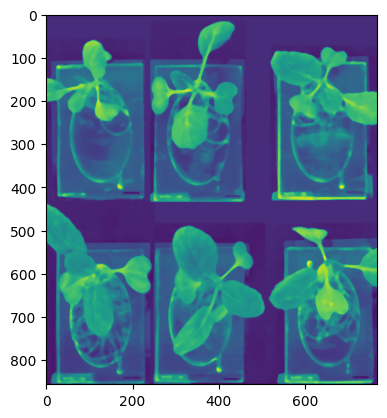

In [ ]:
from skimage.morphology import disk
green2Median = filters.median(green,disk(5))
plt.imshow(green2Median)

- smoothing and border-preserving: Bilateral fiter smooths regions that are semi-homogeneous but preserve borders/edges

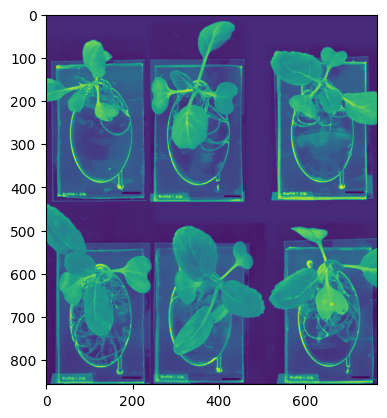

In [ ]:
from skimage.filters.rank import mean_bilateral
green2bilat = (green)
green2bilat = mean_bilateral(green2bilat, disk(7), s0=10,s1=10)
plt.imshow(green2bilat)

Text(0.5, 1.0, 'Bilat')

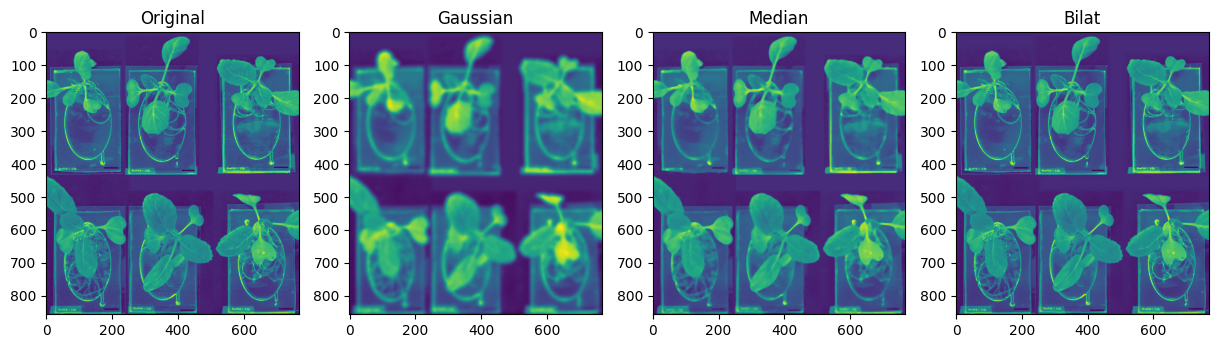

In [ ]:
f, ax = plt.subplots(1, 4, figsize=(15, 10))

ax[0].imshow(green)
ax[0].set_title('Original')

ax[1].imshow(green2Gaussian)
ax[1].set_title('Gaussian')

ax[2].imshow(green2Median)
ax[2].set_title('Median')

ax[3].imshow(green2bilat)
ax[3].set_title('Bilat')

In [ ]:
#Create a list to use plotly
limg2 = [green, img2gray, green2Gaussian, green2Median, green2bilat]# img in list
vimg = np.stack(limg2)
downsample = 2
fig = px.imshow( vimg[:,::downsample,::downsample] , animation_frame=0, binary_string=True, labels=dict(animation_frame="root img"))
fig.show()

## 3.Detect the leaf area from an image <a id ='section3'>
- Enhancing green component
- When you subtract the blue channel from the green channel in an image, you're essentially enhancing the green components of the image relative to the blue ones. This manipulation can make green objects, like leaves, stand out more distinctly in the resulting image. Green leaves have high green channel intensity because they reflect green light strongly and absorb most of blue light.

Text(0.5, 1.0, 'Almost only leaves')

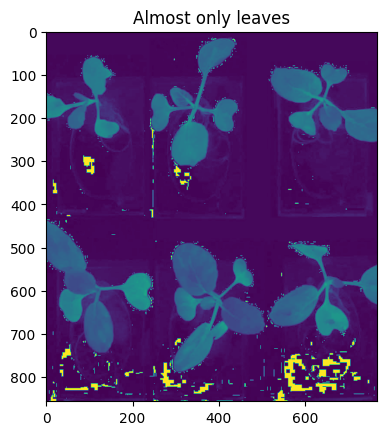

In [ ]:
leaf = img[:,:,1] - img[:,:,2]
plt.imshow(leaf)
plt.title('Almost only leaves')

Text(0.5, 1.0, 'Hello Leaves')

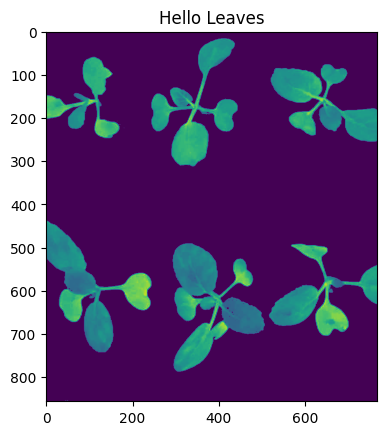

In [ ]:
plt.imshow(((leaf>50) & (leaf<200)) * (leaf))
plt.title('Hello Leaves')

Tiny speckles can show up after segmentation that might be negligible to your problem. For example, you might be interested in counting the number of plants in the image or the area of the largest connected components

In [ ]:
from skimage import feature, measure

binary = (leaf>50) & (leaf<200)

label_img = measure.label(binary)
regions = measure.regionprops(label_img,intensity_image=leaf)

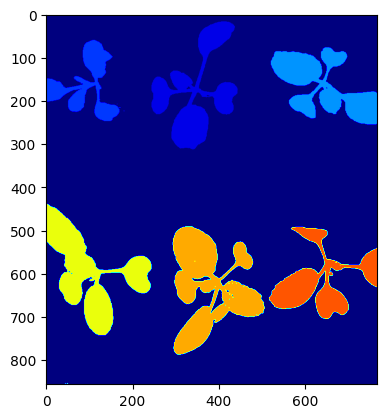

In [ ]:
plt.imshow(label_img,cmap='jet')

In [ ]:
area = [p.area for p in regions]
print(len(area))

11


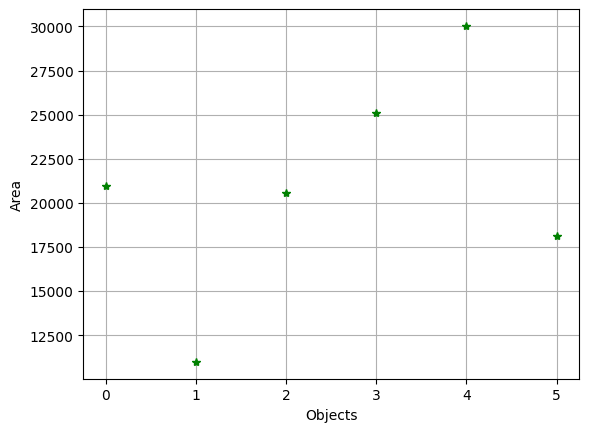

In [ ]:
min_area_you_care = 20
area_array = np.array(area)
filtered_area_array = area_array[area_array>min_area_you_care]
plt.plot(filtered_area_array, '*', color='green')
plt.ylabel('Area')
plt.xlabel('Objects')
plt.grid()

In [ ]:
print(f"The number of plants is: {len(filtered_area_array)}")

The number of plants is: 6


In [ ]:
filtered_area_array

array([20986, 10988, 20576, 25112, 30028, 18151])

## 4.Use your picture
- Upload your picture from your computer
- Alternative: connect to your gdrive and read your picture
- Warning: the leaf detection algorithm might be rough using unexpected inputs

In [ ]:
#Mount google drive = make your gdrive files available within your Google Colab
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Upload your ecofab v.2 color image
uploaded = files.upload()

Saving ecofab_v2_leaf.jpg to ecofab_v2_leaf.jpg


In [ ]:
#Select the filename of the uploaded image
image_filename = list(uploaded.keys())[0]
image = io.imread(image_filename)

In [ ]:
#Describe importante info of an image
def describe_image(image):
  plt.imshow(image)
  print('-----------------------------------------------------------------------')
  print('Image shape is ',image.shape)
  print("Image size in mem: {}MB".format(round(getsizeof(image) / 1024 / 1024,2)))
  print('@CenterSlice: min=',image.min(),',mean=',np.around(image.mean(),decimals=2),',max=',image.max())
  print('dtype = ',image.dtype)
  print('-----------------------------------------------------------------------')

-----------------------------------------------------------------------
Image shape is  (640, 480, 3)
Image size in mem: 0.88MB
@CenterSlice: min= 0 ,mean= 106.36 ,max= 255
dtype =  uint8
-----------------------------------------------------------------------


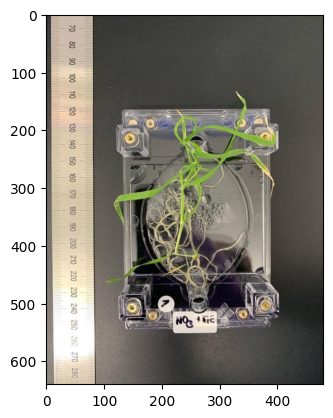

In [ ]:
describe_image(image)

In [ ]:
# Create function using code tested earlier in this colab
def getLeaf(img):
  leaf = img[:,:,1] - img[:,:,2]
  mask = ((leaf>50) & (leaf<200))
  plt.imshow(mask * leaf)
  plt.title('Threshold to get Leaves')
  return mask

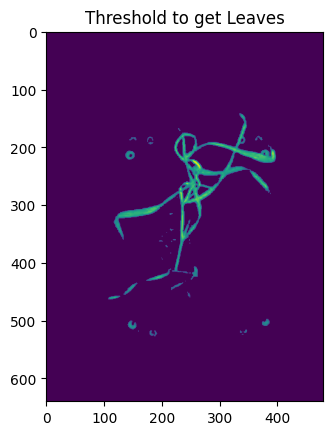

In [ ]:
mask = getLeaf(image)

### Machine learning: supervised classification with RF
- select a subset of the image to traing random forest (RF) model
- apply model to subset
- apply model to the whole image (does it classify unseen pixels?)

In [ ]:
from skimage import segmentation, feature, future
from sklearn.ensemble import RandomForestClassifier
from functools import partial

In [175]:
#Prep your inputs
mask2 = mask[200:300,200:300]
training_labels = mask2.astype(np.uint8) + 1
image2 = image[200:300,200:300,:]
#image2 = image2[:,:,1] - image2[:,:,2]

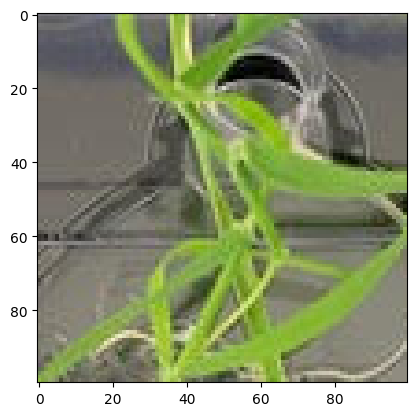

In [176]:
#Select a subset of training set = your image
plt.imshow(image2)

In [177]:
# Define feature extraction function
sigma_min = 1
sigma_max = 16

features_func = partial(
    feature.multiscale_basic_features,
    intensity=True,
    edges=False,
    texture=True,
    sigma_min=sigma_min,
    sigma_max=sigma_max,
    channel_axis=-1
)

# Extract features
features = features_func(image2)

In [178]:
# Train the classifier
clf = RandomForestClassifier(n_estimators=50, n_jobs=-1, max_depth=10, max_samples=0.05)
clf = future.fit_segmenter(training_labels, features, clf)

In [179]:
# Predict segmentation
result = future.predict_segmenter(features, clf)

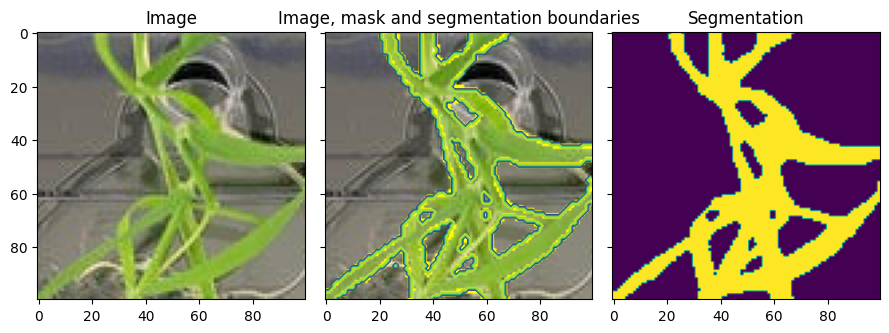

In [180]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(9, 4))
ax[0].imshow(image2)
ax[0].set_title('Image')
ax[1].imshow(segmentation.mark_boundaries(image2, result, mode='thick'))
ax[1].contour(training_labels)
ax[1].set_title('Image, mask and segmentation boundaries')
ax[2].imshow(result)
ax[2].set_title('Segmentation')
fig.tight_layout()

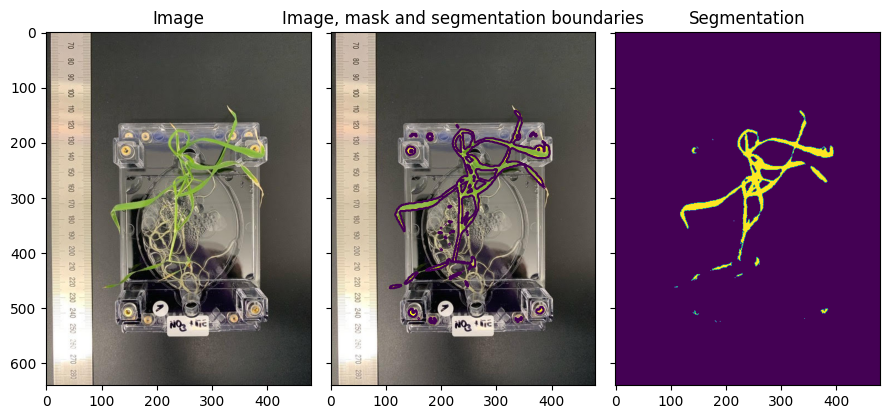

In [181]:
#Now use for the whole image
features = features_func(image)
result = future.predict_segmenter(features, clf)

fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(9, 4))
ax[0].imshow(image)
ax[0].set_title('Image')
ax[1].imshow(segmentation.mark_boundaries(image, result, mode='thick'))
ax[1].contour(mask)
ax[1].set_title('Image, mask and segmentation boundaries')
ax[2].imshow(result)
ax[2].set_title('Segmentation')
fig.tight_layout()

## 5.Conclusions<a id ='section4'>

* Linear algebra and matrices form the bedrock of image analysis and computer vision, providing a powerful mathematical framework for manipulating and interpreting digital images.

* An image is a matrix of pixel values, where each element represents the intensity or color at a specific location. This representation makes linear algebraic operations crucial for various image processing tasks, including transformations, filtering, and compression.

* Techniques such as rotation, scaling, and shearing of images are achieved through matrix multiplication, while more complex operations like edge detection, blurring, and feature extraction leverage convolutions to analyze and enhance images.




## Extra - Exercise: Now that you know that color images consist of three matrices, you can create filters just like in Instagram! Write a function that creates a sepia tone of an image.

Tip:        newR = (R * 0.393 + G * 0.769 + B * 0.189)
            newG = (R * 0.349 + G * 0.686 + B * 0.168)
            newB = (R * 0.272 + G * 0.534 + B * 0.131)

In [ ]:
R = img[:,:,0] #perhaps omit this part in exercise?
G = img[:,:,1]
B = img[:,:,2]

newImg = np.zeros(img.shape,dtype=float)

newImg[:,:,0] = R * 0.393 + G * 0.769 + B * 0.189
newImg[:,:,1] = R * 0.349 + G * 0.686 + B * 0.168
newImg[:,:,2] = R * 0.272 + G * 0.534 + B * 0.131

# Clip the values to ensure within the [0, 255] range and convert to uint8
newImg = np.clip(newImg, 0, 255).astype(np.uint8)


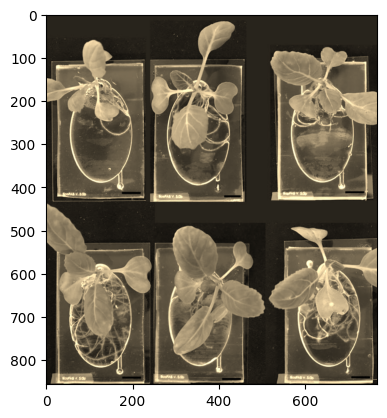

In [ ]:
plt.imshow(newImg)

Notebook developed by: Dani Ushizima

Acknowledgements: Zineb Sordo, Vlastimil Novak, Peter Andeer, Trent Northen, Susannah Tringe, Alisa Bettale

Date: July 2024